In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

from scipy.stats import pearsonr # correlation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler,MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier,export_graphviz

from IPython.display import Image
from os import system

from sklearn.ensemble import BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# fromom sklearn.externals.six import StringIO
# import pydotplus
# import graphviz
from statistics import mean, median

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,precision_score,recall_score

In [2]:
accuracy_scores = {}
data = pd.read_csv('Materials/bank-full.csv')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


## EDA

In [3]:
data.shape

(45211, 17)

In [4]:
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

## Observation 

---Ten features are object type 
---Seven are numbers

---Multi class = Job, Marital, education, month
---Binary  = housing,loan,default


In [5]:
data[['job','marital','education','default','housing','loan','contact','month','poutcome','Target']] = data[['job','marital','education','default','housing','loan','contact','month','poutcome','Target']].apply(pd.Categorical)

data.dtypes.to_frame('Datatypes of attributes').T #for datatypes of attributes

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
Datatypes of attributes,int64,category,category,category,category,int64,category,category,category,int64,category,int64,int64,int64,int64,category,category


In [6]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [7]:
## Check the presence of missing values

data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

In [8]:
data.head(1)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no


In [9]:
data['poutcome'].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [10]:
data['contact'].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

In [11]:
data['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [12]:
data['marital'].value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [13]:
data['education'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [14]:
data['default'].value_counts()

no     44396
yes      815
Name: default, dtype: int64

In [15]:
data['housing'].value_counts()

yes    25130
no     20081
Name: housing, dtype: int64

In [16]:
data['loan'].value_counts()

no     37967
yes     7244
Name: loan, dtype: int64

In [17]:
data['month'].value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

In [18]:
data['Target'].value_counts()

no     39922
yes     5289
Name: Target, dtype: int64

## Observation

The following categories has the unknown feature

---education
---job
---contact
---poutcome

## 5 Point Summary of Numerical Attribute

In [19]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


## Outliers

---Balance
---Age
---Previous
---Duration
---Campaign
---pdays

C:\Users\LENOVO\anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  del sys.path[0]


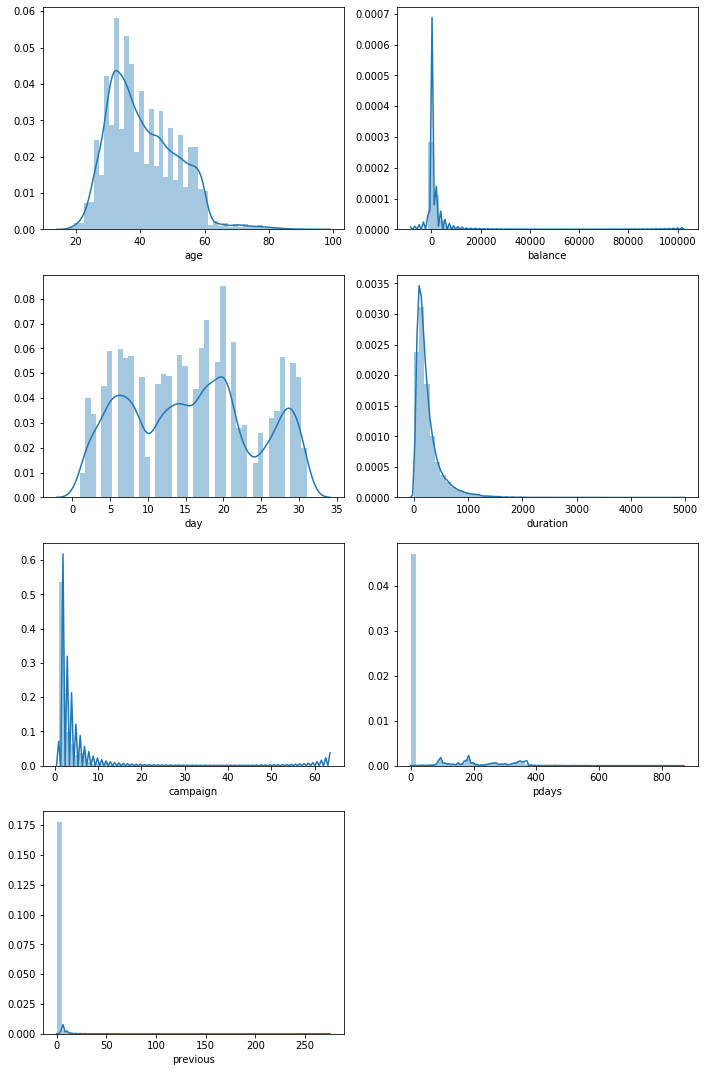

In [20]:
## Distribution of Distribution

fig, axe = plt.subplots(nrows=4, ncols=2, figsize=(10, 15)) 
axe = axe.flatten() 
sn.distplot(data['age'],ax=axe[0])
sn.distplot(data['balance'],ax=axe[1]) 
sn.distplot(data['day'],ax=axe[2]) 
sn.distplot(data['duration'],ax=axe[3]) 
sn.distplot(data['campaign'],ax=axe[4]) 
sn.distplot(data['pdays'],ax=axe[5],kde_kws={'bw':0.1}) 
sn.distplot(data['previous'],ax=axe[6],kde_kws={'bw':0.1}) 
fig.tight_layout() 
fig.show() 
axe.flat[-1].set_visible(False)

## Distribution of Categorical columns.

C:\Users\LENOVO\anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  from ipykernel import kernelapp as app


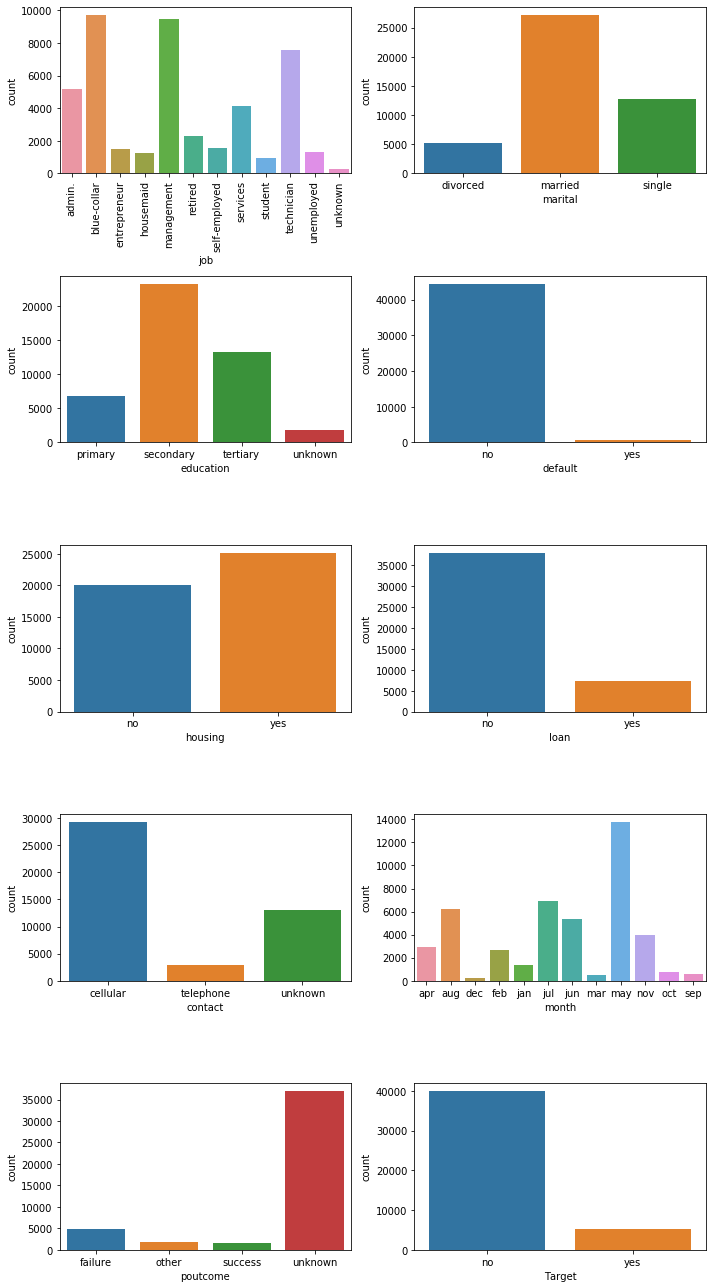

In [21]:
fig, axe = plt.subplots(nrows=5, ncols=2, figsize=(10, 18)) 
axe = axe.flatten() #to flatten subplot index positions
plot=sn.countplot(x=data['job'],data=data,ax=axe[0]) #Countplot of 'job' 
plt.setp(plot.get_xticklabels(), rotation=90)
sn.countplot(x=data['marital'],data=data,ax=axe[1]) #Countplot of 'marital' 
sn.countplot(x=data['education'],data=data,ax=axe[2]) #Countplot of 'education' 
sn.countplot(x=data['default'],data=data,ax=axe[3]) #Countplot of 'default' 
sn.countplot(x=data['housing'],data=data,ax=axe[4]) #Countplot of 'housing' 
sn.countplot(x=data['loan'],data=data,ax=axe[5]) #Countplot of 'loan' 
sn.countplot(x=data['contact'],data=data,ax=axe[6]) #Countplot of 'contact' 
sn.countplot(x=data['month'],data=data,ax=axe[7]) #Countplot of 'month' 
sn.countplot(x=data['poutcome'],data=data,ax=axe[8]) #Countplot of 'poutcome' 
sn.countplot(x=data['Target'],data=data,ax=axe[9]) #Countplot of 'target' 
fig.tight_layout() #for arranging the plots
fig.show() #display plots


## Understanding from distributions

More than 90% customers have no default credit
Around 88% customers have not subscribed for term deposit
Most customers have been contacted in may
Most customers have been contacted by cellular network(mobile phone)
Number of customers who have housing loan is more than the number of customers who don't have housing loan
Around 6% customers have credit in default


## Measure of skewness of numerical columns

In [22]:
data.skew().to_frame('Skewness Measure')

,Skewness Measure
age,0.684818
balance,8.360308
day,0.093079
duration,3.144318
campaign,4.898650
pdays,2.615715
previous,41.846454


C:\Users\LENOVO\anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


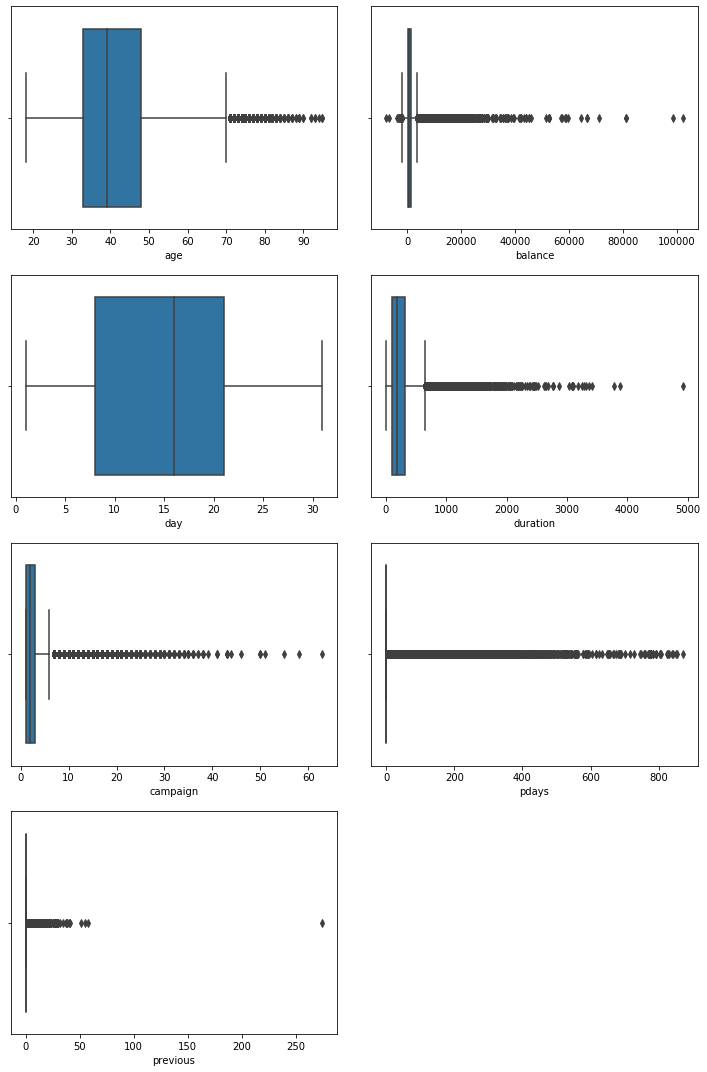

In [23]:
#Checking the presence of outliers

fig, axe = plt.subplots(nrows=4, ncols=2, figsize=(10, 15)) 
axe = axe.flatten() 
sn.boxplot(x = 'age',data=data,ax=axe[0])
sn.boxplot(x = 'balance',data=data,ax=axe[1])
sn.boxplot(x = 'day',data=data,ax=axe[2])
sn.boxplot(x = 'duration',data=data,ax=axe[3])
sn.boxplot(x = 'campaign',data=data,ax=axe[4])
sn.boxplot(x = 'pdays',data=data,ax=axe[5])
sn.boxplot(x = 'previous',data=data,ax=axe[6])
    

# sn.distplot(data[''],ax=axe[5],kde_kws={'bw':0.1}) 
# sn.distplot(data[''],ax=axe[6],kde_kws={'bw':0.1}) 
fig.tight_layout() 
fig.show() 
axe.flat[-1].set_visible(False)

In [24]:
data['Target'].value_counts().to_frame("Target Distribution")

,Target Distribution
no,39922
yes,5289


In [25]:
df = data.copy()
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [26]:
le = LabelEncoder()
df['marital'] = le.fit_transform(df['marital']).astype('int')
df['education'] = le.fit_transform(df['education']).astype('int')
df['default'] = le.fit_transform(df['default']).astype('int')
df['housing'] = le.fit_transform(df['housing']).astype('int')
df['loan'] = le.fit_transform(df['loan']).astype('int')
df['month'] = le.fit_transform(df['month']).astype('int')
df['poutcome'] = le.fit_transform(df['poutcome']).astype('int')
df['Target'] = le.fit_transform(df['Target']).astype('int')

In [27]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,1,2,0,2143,1,0,unknown,5,8,261,1,-1,0,3,0
1,44,technician,2,1,0,29,1,0,unknown,5,8,151,1,-1,0,3,0
2,33,entrepreneur,1,1,0,2,1,1,unknown,5,8,76,1,-1,0,3,0
3,47,blue-collar,1,3,0,1506,1,0,unknown,5,8,92,1,-1,0,3,0
4,33,unknown,2,3,0,1,0,0,unknown,5,8,198,1,-1,0,3,0


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        45211 non-null  category
 2   marital    45211 non-null  int32   
 3   education  45211 non-null  int32   
 4   default    45211 non-null  int32   
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  int32   
 7   loan       45211 non-null  int32   
 8   contact    45211 non-null  category
 9   day        45211 non-null  int64   
 10  month      45211 non-null  int32   
 11  duration   45211 non-null  int64   
 12  campaign   45211 non-null  int64   
 13  pdays      45211 non-null  int64   
 14  previous   45211 non-null  int64   
 15  poutcome   45211 non-null  int32   
 16  Target     45211 non-null  int32   
dtypes: category(2), int32(8), int64(7)
memory usage: 3.9 MB


In [29]:
df[['job','marital','education','default','housing','loan','contact','month','poutcome','Target']] = df[['job','marital','education','default','housing','loan','contact','month','poutcome','Target']].apply(pd.Categorical)

In [30]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        45211 non-null  category
 2   marital    45211 non-null  category
 3   education  45211 non-null  category
 4   default    45211 non-null  category
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  category
 7   loan       45211 non-null  category
 8   contact    45211 non-null  category
 9   day        45211 non-null  int64   
 10  month      45211 non-null  category
 11  duration   45211 non-null  int64   
 12  campaign   45211 non-null  int64   
 13  pdays      45211 non-null  int64   
 14  previous   45211 non-null  int64   
 15  poutcome   45211 non-null  category
 16  Target     45211 non-null  category
dtypes: category(10), int64(7)
memory usage: 2.8 MB


## Handling outliers with mean replacement

C:\Users\LENOVO\anaconda3\lib\site-packages\ipykernel_launcher.py:28: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


Boxplots after handeling outliers


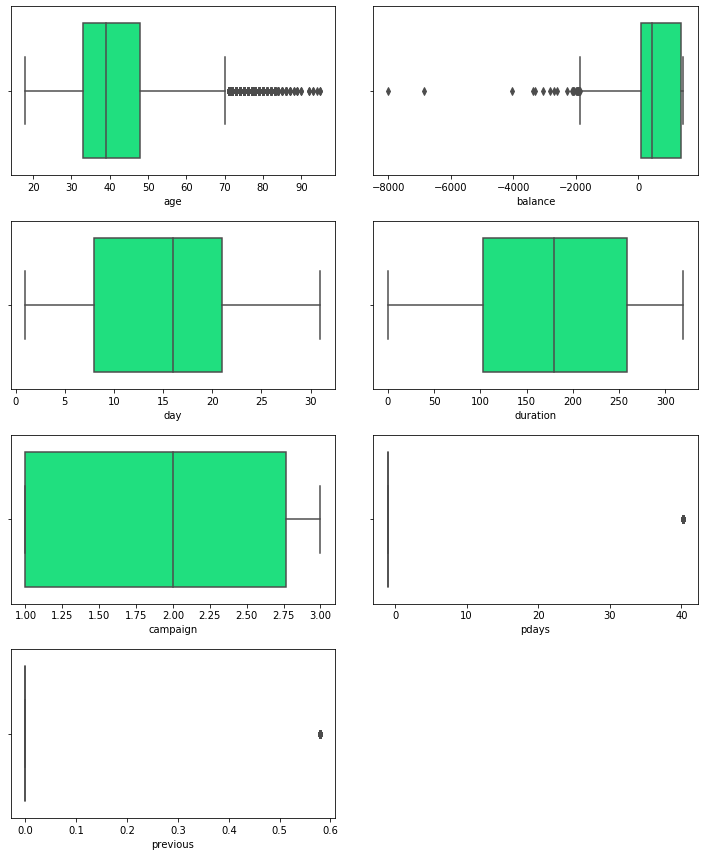

In [31]:
meanbal = float(df['balance'].mean()) #mean balance
df['balance'] = np.where(df['balance'] >np.percentile(df['balance'], 75), meanbal,df['balance']) #replacing with mean

meandur = float(df['duration'].mean()) #mean duration
df['duration'] = np.where(df['duration'] >np.percentile(df['duration'], 75), meandur,df['duration'])#replacing with mean

meancam = float(df['campaign'].mean()) #mean campaign
df['campaign'] = np.where(df['campaign'] >np.percentile(df['campaign'], 75), meancam,df['campaign'])#replacing with mean

meanpd = float(df['pdays'].mean()) #mean pdays
df['pdays'] = np.where(df['pdays'] >np.percentile(df['pdays'], 75), meanpd,df['pdays'])#replacing with mean

meanpr = float(df['previous'].mean()) #mean previous
df['previous'] = np.where(df['previous'] >np.percentile(df['previous'], 75),meanpr ,df['previous'])#replacing with mean



fig, axe = plt.subplots(nrows=4, ncols=2, figsize=(10, 12))
axe = axe.flatten()#to flatten subplot index positions
sn.boxplot(x='age',data=df,color='springgreen',ax=axe[0]) #Box plot of 'ID' for finding outliers 
sn.boxplot(x='balance',data=df,color='springgreen',ax=axe[1]) #Box plot of 'Family' 
sn.boxplot(x='day',data=df,color='springgreen',ax=axe[2]) #Box plot of 'Personal Loan' 
sn.boxplot(x='duration',data=df,color='springgreen',ax=axe[3]) #Box plot of 'CD Account' 
sn.boxplot(x='campaign',data=df,color='springgreen',ax=axe[4]) #Box plot of 'Online' 
sn.boxplot(x='pdays',data=df,color='springgreen',ax=axe[5]) #Box plot of 'CreditCard'
sn.boxplot(x='previous',data=df,color='springgreen',ax=axe[6]) #Box plot of 'CreditCard' 
fig.tight_layout() #for arranging the plots
fig.show() #display plots
axe.flat[-1].set_visible(False)
print('\033[1m''Boxplots after handeling outliers')

## Correlation Plot of all Features


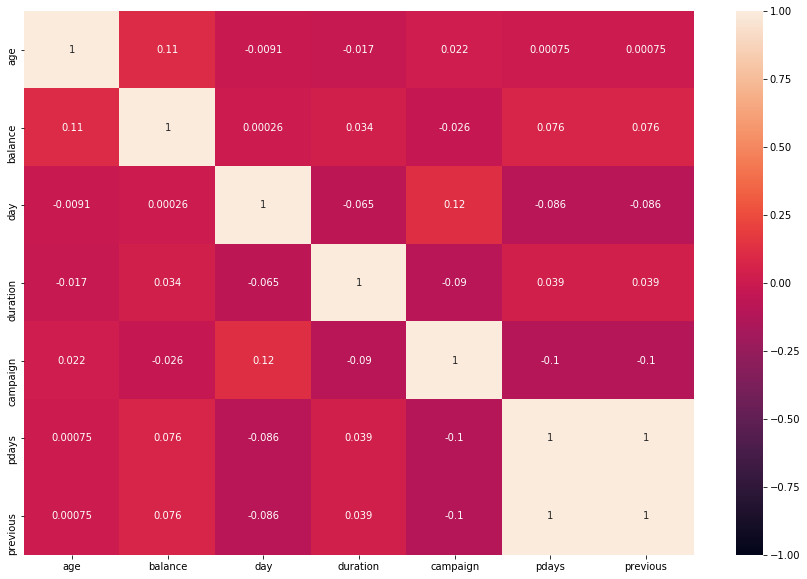

In [32]:
plt.figure(figsize=(15,10))
sn.heatmap(df.corr(),annot=True,vmax=1,vmin=-1)

## Coorelation Matrix before removing the outliers

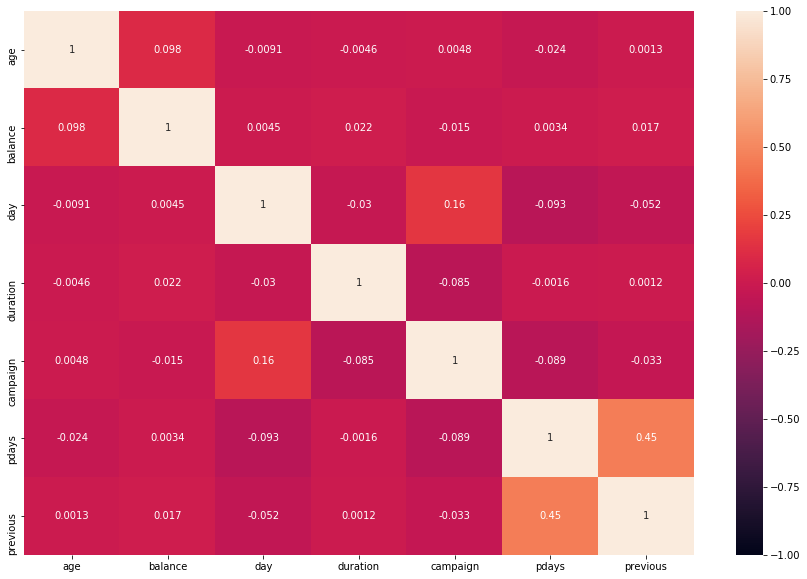

In [33]:
plt.figure(figsize=(15,10))
sn.heatmap(data.corr(),annot=True,vmax=1,vmin=-1)

## Understanding from above corrp plot:
'pdays' and 'previous' are highly correlated

## Removing columns:
'job','education' and 'contact' attributes contain multiple unknown values.

As they are specific string values and not numerical so cannot be treated with median, mean replacement

As per data description, duration attribute is removed to have a realistic prediction.

'day' and 'month' of contact will not have any realtionship with customer opting for subscription

'pdays' and 'previous' are highly correlated so removing any one from both of them.

Even though 'poutcome' has a huge number of 'Unknown' values, it is kept because 'poutcome' is outcome of the previous marketing campaign. Which can help in better training and testing of models.

In [34]:
df2 = df.drop(['job','education','contact','duration','pdays','day','month'],axis=1) #Dropping 'job','education','contact','poutcome','duration','day','month' columns
df2.head() #Head of updated dataframe

,age,marital,default,balance,housing,loan,campaign,previous,poutcome,Target
0,58,1,0,1362.272058,1,0,1.0,0.0,3,0
1,44,2,0,29.000000,1,0,1.0,0.0,3,0
2,33,1,0,2.000000,1,1,1.0,0.0,3,0
3,47,1,0,1362.272058,1,0,1.0,0.0,3,0
4,33,2,0,1.000000,0,0,1.0,0.0,3,0


# Pairplot
Multivariate Analysis

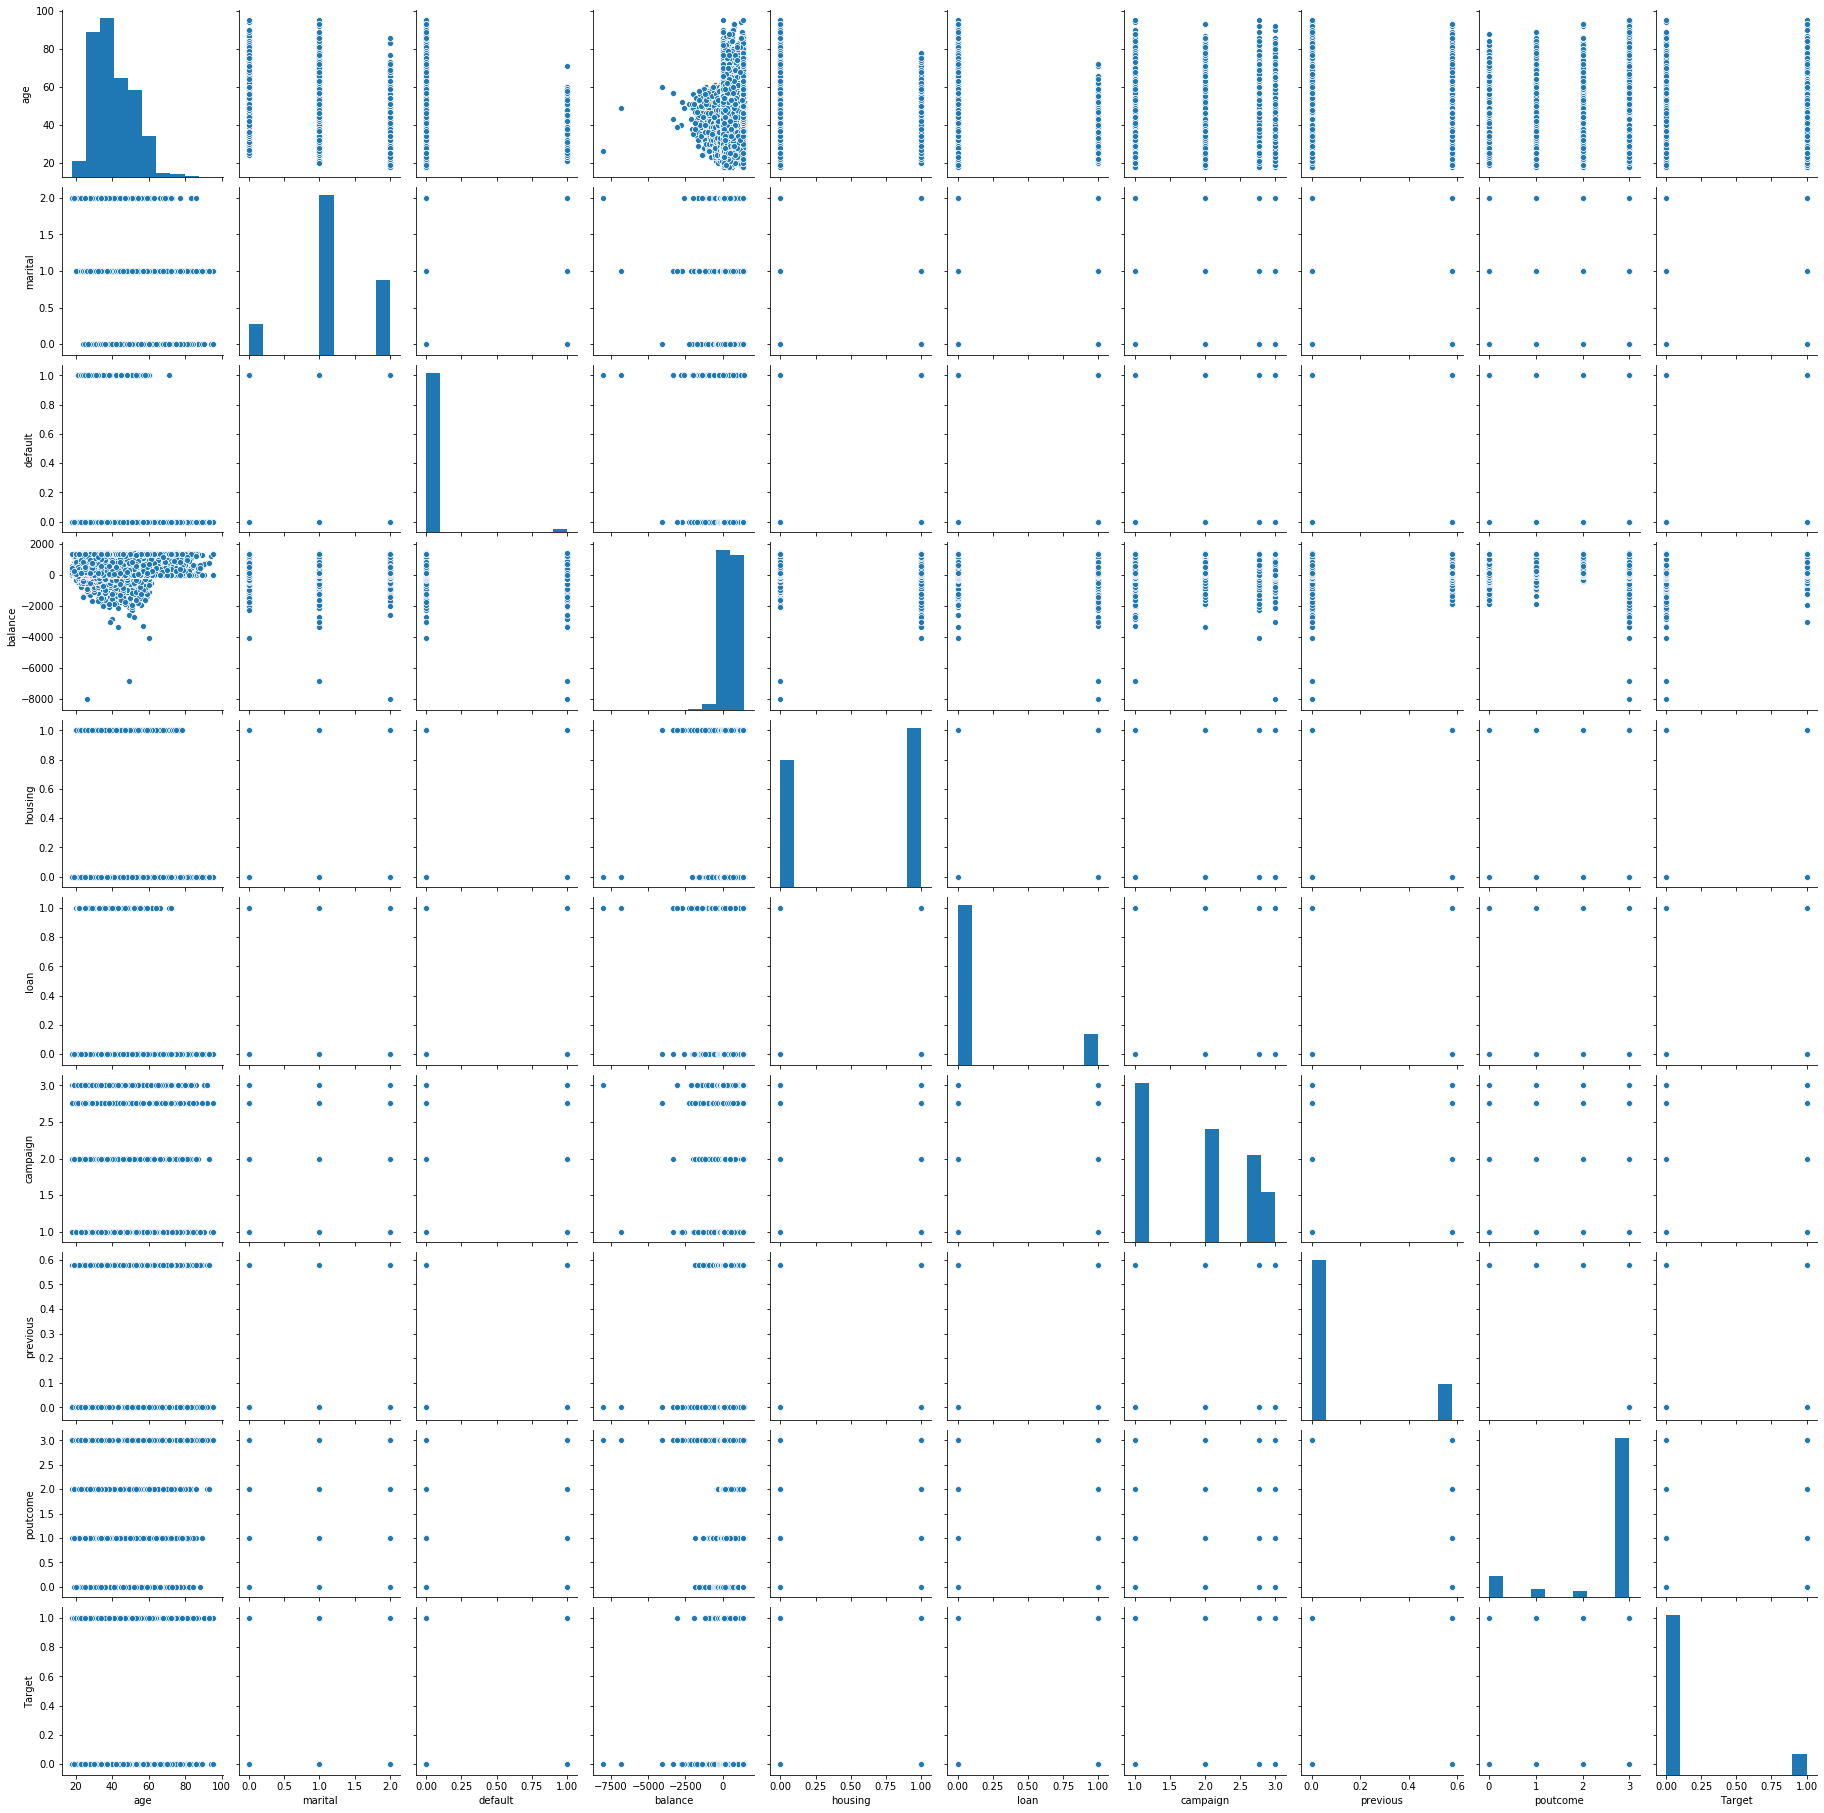

In [35]:
sn.pairplot(df2)

# Splitting the train test data

In [36]:
X = df2.drop('Target',axis=1)
y=df2['Target']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=2)

# Scaling the X and Y variables

In [37]:
scalar = StandardScaler()
x_train_scaled = scalar.fit_transform(X_train)
x_test_scaled = scalar.fit_transform(X_test)

# Models


## Logistic Regression Model

In [38]:
logistic = LogisticRegression(solver='liblinear')
logistic.fit(x_train_scaled,y_train)
y_pred = logistic.predict(x_test_scaled)
LogRegAcc = accuracy_score(y_test,y_pred)
accuracy_scores['logistic reg'] = LogRegAcc
print(confusion_matrix(y_test,y_pred))
print(LogRegAcc)
print(classification_report(y_test,y_pred))

[[11892   107]
 [ 1318   247]]
0.8949424948392805
              precision    recall  f1-score   support

           0       0.90      0.99      0.94     11999
           1       0.70      0.16      0.26      1565

    accuracy                           0.89     13564
   macro avg       0.80      0.57      0.60     13564
weighted avg       0.88      0.89      0.86     13564



# Naive Baiyes

In [39]:
NaiveB = GaussianNB()
NaiveB.fit(x_train_scaled,y_train)
y_pred = NaiveB.predict(x_test_scaled)
print(confusion_matrix(y_test,y_pred))
accuracy_scores['naive bayes'] = accuracy_score(y_test,y_pred)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[10667  1332]
 [ 1055   510]]
0.8240194632851666
              precision    recall  f1-score   support

           0       0.91      0.89      0.90     11999
           1       0.28      0.33      0.30      1565

    accuracy                           0.82     13564
   macro avg       0.59      0.61      0.60     13564
weighted avg       0.84      0.82      0.83     13564



# KNN Model

In [40]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train_scaled,y_train)
y_pred = knn.predict(x_test_scaled)
accuracy_scores['knn'] = accuracy_score(y_test,y_pred)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[11465   534]
 [ 1236   329]]
0.8695075199056326
              precision    recall  f1-score   support

           0       0.90      0.96      0.93     11999
           1       0.38      0.21      0.27      1565

    accuracy                           0.87     13564
   macro avg       0.64      0.58      0.60     13564
weighted avg       0.84      0.87      0.85     13564



# SVC Model

In [41]:
svc = SVC()
svc.fit(x_train_scaled,y_train)
y_pred = svc.predict(x_test_scaled)
accuracy_scores['svc'] = accuracy_score(y_test,y_pred)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[11856   143]
 [ 1287   278]]
0.8945738720141552
              precision    recall  f1-score   support

           0       0.90      0.99      0.94     11999
           1       0.66      0.18      0.28      1565

    accuracy                           0.89     13564
   macro avg       0.78      0.58      0.61     13564
weighted avg       0.87      0.89      0.87     13564



# DecisionTreeClassifier

In [42]:
dtree = DecisionTreeClassifier(criterion="gini", random_state=2)
dtree.fit(x_train_scaled,y_train)
y_pred = dtree.predict(x_test_scaled)
accuracy_scores['dtree'] = accuracy_score(y_test,y_pred)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))


[[10826  1173]
 [ 1182   383]]
0.8263786493659687
              precision    recall  f1-score   support

           0       0.90      0.90      0.90     11999
           1       0.25      0.24      0.25      1565

    accuracy                           0.83     13564
   macro avg       0.57      0.57      0.57     13564
weighted avg       0.83      0.83      0.83     13564



# Feature Importance Test for Decision tree

In [43]:
xvar = df.drop('Target', axis=1) #variables in x
feature_cols = xvar.columns # columns in x
feat_importance = dtree.tree_.compute_feature_importances(normalize=False) #compute feature importance


feat_imp_dict = dict(zip(feature_cols, dtree.feature_importances_)) #dictionary of columns and importance
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index') #conversion of dictionary to dataframe
feat_imp.sort_values(by=0, ascending=False) #sort in descending order

,0
education,0.446233
age,0.260209
contact,0.091183
housing,0.073592
job,0.040146
loan,0.034786
balance,0.029128
default,0.020581
marital,0.004142


# BaggingClassifier

In [44]:
bagC = BaggingClassifier(base_estimator=dtree,n_estimators=500,random_state=1)
bagC.fit(x_train_scaled,y_train)
y_pred = bagC.predict(x_test_scaled)
accuracy_scores['baggingClassifier'] = accuracy_score(y_test,y_pred)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[11549   450]
 [ 1231   334]]
0.8760690061928634
              precision    recall  f1-score   support

           0       0.90      0.96      0.93     11999
           1       0.43      0.21      0.28      1565

    accuracy                           0.88     13564
   macro avg       0.66      0.59      0.61     13564
weighted avg       0.85      0.88      0.86     13564



# Adaptive Boosting Ensemble Technique

In [45]:
AdaBoost = AdaBoostClassifier(n_estimators=50,random_state=1)
AdaBoost.fit(x_train_scaled,y_train)
y_pred = AdaBoost.predict(x_test_scaled)
accuracy_scores['AdaBoostClassifier'] = accuracy_score(y_test,y_pred)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[11885   114]
 [ 1324   241]]
0.8939840754939545
              precision    recall  f1-score   support

           0       0.90      0.99      0.94     11999
           1       0.68      0.15      0.25      1565

    accuracy                           0.89     13564
   macro avg       0.79      0.57      0.60     13564
weighted avg       0.87      0.89      0.86     13564



# Random Forest Classifier

In [46]:
ranF = RandomForestClassifier(n_estimators=100,random_state=1,max_features=3)
ranF.fit(x_train_scaled,y_train)
y_pred = ranF.predict(x_test_scaled)
accuracy_scores['RanForestClassifier'] = accuracy_score(y_test,y_pred)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[11495   504]
 [ 1225   340]]
0.8725302270716603
              precision    recall  f1-score   support

           0       0.90      0.96      0.93     11999
           1       0.40      0.22      0.28      1565

    accuracy                           0.87     13564
   macro avg       0.65      0.59      0.61     13564
weighted avg       0.85      0.87      0.86     13564



# Gradient Boosting

In [47]:
gradBoost = GradientBoostingClassifier(n_estimators=100,random_state=2)
gradBoost.fit(x_train_scaled,y_train)
y_pred = gradBoost.predict(x_test_scaled)
accuracy_scores['gradBoost'] = accuracy_score(y_test,y_pred)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[11901    98]
 [ 1331   234]]
0.8946475965791801
              precision    recall  f1-score   support

           0       0.90      0.99      0.94     11999
           1       0.70      0.15      0.25      1565

    accuracy                           0.89     13564
   macro avg       0.80      0.57      0.60     13564
weighted avg       0.88      0.89      0.86     13564



# Model with Accuracy Scores

In [48]:
acc_scores = pd.DataFrame(accuracy_scores.items(),columns=['Model','Accuracy score']) #Conversion of dict to dataframe


In [51]:
acc_scores.sort_values(by='Accuracy score',ascending=False)

,Model,Accuracy score
0,logistic reg,0.894942
8,gradBoost,0.894648
3,svc,0.894574
6,AdaBoostClassifier,0.893984
5,baggingClassifier,0.876069
7,RanForestClassifier,0.872530
2,knn,0.869508
4,dtree,0.826379
1,naive bayes,0.824019


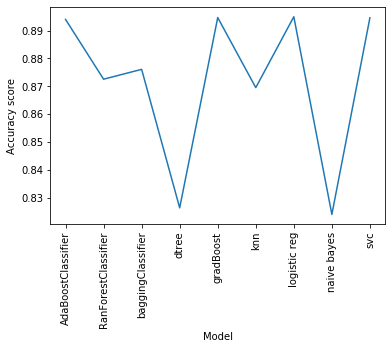

In [52]:
sn.lineplot(x=acc_scores['Model'],y=acc_scores['Accuracy score'],data=acc_scores,markers=True, dashes=False) #Countplot of Scores
plt.xticks(rotation=90)
plt.show()

# Conclusion:
Comments on dataset:

The models perform well in predicting the class 0 i.e. customer not subscribing to term deposit which can be seen in the confusion matrix of all models.

The models do not perform well in predicting the class 1 i.e. customer subscribing to term deposit which can be seen in the confusion matrix of all models.

Above situation occured because the Dataset is imbalanced. i.e. The ratio difference between class 0 and class 1 is huge. Which trained models to effectively identify class 0 but did not train suffuiciently to classify class 1.

This situation could have been avoided if the datset was balanced.

Along with imbalance, the dataset contained large number of unknown string values in 'job','education','contact' and 'poutcome' columns.

Comments on Models:

When benchmarking with 'duration' column, Support Vector Classifier achieved 90% model accuracy while naive bayes score was 85% accurate.

SVC Perfomed better because of it's capabality of creating multiple hpyerplanes and then classifying the data.

After removing the 'duration' column, The highest model score dropped by 0.5%.

The Outliers did not affect much on accuracy scores of all models. As can be seen in above accuracy scores, getting rid of outliers by mean/median replacement did not affect the scores.

In Decision Trees, Gradient boosting method always performed better for this dataset.

While visualizing Decision Tree, The Pruned decision tree was easy to visualize as it had lesser leaf nodes than Tree which was not pruned.

Miscellaneous Comments:

After trying get_dummies the score did not show significant difference as well as I have skipped the get_dummies step because the dataset was creating more dimension, which was making the project more computationally intensive.

If I had kept get_dummies step, then in production stage if the new dataset turned out to be huge in number of rows then this project would have taken a lot of time to execute.

Outlier handeling did not make any significant difference in the accuracy scores of models.

I have tried to keep minimum time complexity of this project.